<a href="https://colab.research.google.com/github/93model/93model/blob/master/ai10_sc1_pro_%EA%B9%80%EC%97%B0%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC1 Project 프로젝트 설명서

연식님은 게임 회사의 데이터 팀에 합류했습니다.

다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

아래의 링크를 통해 파일을 다운로드 받으세요.

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

# **Data Description**

Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

# **Goal of project**
앞서 알려드린 것 처럼.

**다음 분기에 어떤 게임을 설계해야 할까**

---



를 정하는 과정과 그 결과를 보여주는 것이 목표입니다.

데이터셋을 읽는 것 부터,

이러한 게임을 만들어야 한다는 결론까지 의 과정을 colab을 사용하여 작성하고,

해당 내용을 기반으로 설명하는 영상을 작성하는 것이

김연식님이 이번 프로젝트 기간 동안 하셔야 하는 일입니다.

당연히 어떠한 코드, 분석, 라이브러리 혹은 목표를 가지는지는 온전히 김연식님의 자유입니다.

그러나, Section 1 Project 인 만큼 해당 기간 동안 배운 내용을 위주로 설정하는 것이 권장됩니다.

아직 배우지 않은 Deep Learning을 사용하면 곤란하겠죠?

추가로, 김연식님의 발표를 듣는 사람은 비데이터 직군이라 가정합니다.

즉 김연식님의 생각이나 가정들을 설명하는 과정에서 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력하셔야 할 겁니다.

# **Keywords (참조용)**

Section 1때 배운 내용들은 다음과 같습니다.

Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization

Sprint 2 : Hypothesis Test, CI, Bayesian

Sprint 3 : DR, PCA, Cluster




# **반드시 들어가야 하는 내용.**

앞서서 여러분에게 최대한의 자유를 드린다고 했지만, 그래도 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.

1. **지역에 따라서 선호하는 게임 장르가 다를까** 라는 질문에 대답을 하셔야합니다.
2. **연도별 게임의 트렌드가 있을까** 라는 질문에 대답을 하셔야합니다.
3. **출고량이 높은 게임에 대한 분석 및 시각화 프로세스**가 포함되어야 합니다.

위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트
를 완성하세요.


# **기타**

발표영상의 시간은 8분으로 제한합니다.
발표영상 촬영 방법은 다른 문서를 참조하세요.
가능한 코드에 커멘트를 달아주는 것이 권장되지만, 모든 코드 내용을 한줄 한줄 설명할 필요는 없습니다.
단, 내가 이런 분석을 했는데 이 부분은 꼭 설명하고 싶다, 라는 내용이 있으면 설명해도 좋습니다.호

# **Code**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS_AI_10/Sc1/Sc1_Project/vgames2.csv')



https://www.vgchartz.com/

의 데이터를 크롤링 한 것으로 추정

https://www.kaggle.com/gregorut/videogamesales 를 수정

K,M 으로 표시된 데이터의 크기를 통일

기본 단위는 M(million, 백만)=  100,0000

K = 1000

1000K = 1M

480K = 0.48 M

M으로 끝나는 건 1000으로 나눈다

In [17]:
# M, K 가 든 값 단위통일
df['NA_Sales'] = df['NA_Sales'].replace({'M': '', 'K': 'e-03'}, regex=True).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({'M': '', 'K': 'e-03'}, regex=True).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({'M': '', 'K': 'e-03'}, regex=True).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({'M': '', 'K': 'e-03'}, regex=True).astype(float)

df['Sales'] = df['NA_Sales'] + df['EU_Sales'] +df['JP_Sales'] +df['Other_Sales'] # 전세계 판매량 열 생성

In [18]:
# 년도 오입력 값 살리기
def toyear(x):
  if x < 20:
     return 2000 + x
  elif (x > 20) and (x < 99):
     return 1900 + x
  else:
     return x

df['Year'] = df['Year'].apply(toyear)

In [25]:
# 결측치 제거
df= df.dropna(axis = 0, how = 'any')


Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Sales          0
dtype: int64

# **1. 지역에 따라서 선호하는 게임 장르가 다를까**

귀무가설 : 지역에 따라 장르에 따른 판매량의 차이가 없다.


대립가설 : 지역에 따라 장르에 따른 판매량의 차이가 있다. (p < 0.05 )

1) 지역별로 장르에 대해 ANOVA 검정


In [28]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

NA_ano=ols('NA_Sales ~ C(Genre)',df).fit()
anova_lm(NA_ano)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,167.598330,15.236212,22.859221,3.400631e-47
Residual,16229.0,10817.012674,0.666524,NaN,NaN


In [21]:
EU_ano=ols('EU_Sales ~ C(Genre)',df).fit()
anova_lm(EU_ano)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,41.534932,3.775903,14.748175,6.682042e-29
Residual,16229.0,4155.031234,0.256025,NaN,NaN


In [22]:
JP_ano=ols('JP_Sales ~ C(Genre)',df).fit()
anova_lm(JP_ano)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,51.107998,4.646182,50.193819,2.034770e-109
Residual,16229.0,1502.234407,0.092565,NaN,NaN


In [23]:
Ot_ano=ols('Other_Sales ~ C(Genre)',df).fit()
anova_lm(Ot_ano)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,4.964596,0.451327,12.643548,3.249514e-24
Residual,16229.0,579.313958,0.035696,NaN,NaN


2) ANOVA 검정 결과 모든 지역에서 p < 0.05 로 귀무가설 기각

-> 지역에 따라 장르에 따른 판매량의 차이가 있다.



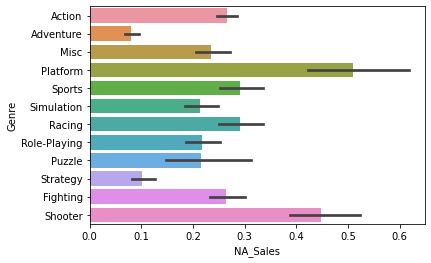

In [29]:
import seaborn as sns

sns.barplot(x='NA_Sales', y='Genre', data=df)

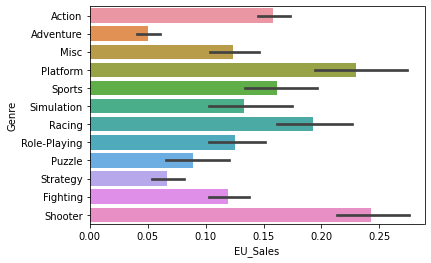

In [30]:
sns.barplot(x='EU_Sales', y='Genre', data=df)

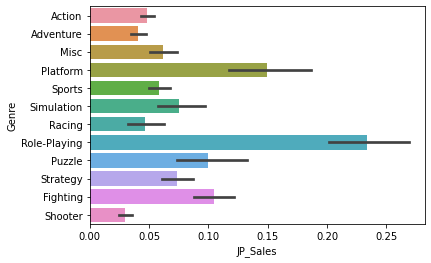

In [15]:
sns.barplot(x='JP_Sales', y='Genre', data=df)

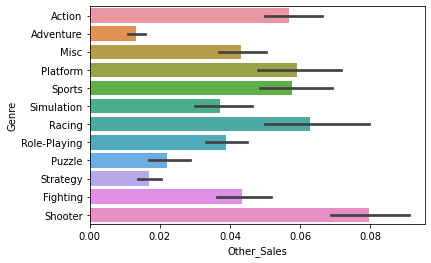

In [16]:
sns.barplot(x='Other_Sales', y='Genre', data=df)

In [17]:
df_region = df.groupby(['Genre'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].agg(['mean']).reset_index() ##  장르별 지역 출고량의 평균
df_region

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
,,mean,mean,mean,mean
0,Action,0.265046,0.158531,0.048333,0.056787
1,Adventure,0.080276,0.050205,0.040907,0.013170
2,Fighting,0.263892,0.119641,0.104359,0.043293
3,Misc,0.234819,0.123825,0.061975,0.043212
4,Platform,0.510172,0.229817,0.149519,0.058935
5,Puzzle,0.214806,0.089170,0.099364,0.021979
6,Racing,0.290976,0.192797,0.046202,0.062765
7,Role-Playing,0.217584,0.124976,0.234082,0.038724
8,Shooter,0.448812,0.242367,0.029828,0.079578


3) 지역별로 가장 많이 팔리는 장르는 ?

북미 : Platform

유럽 : Shooter

일본 : Role-Playing

기타 : Shooter


# **2. 연도별 게임의 트렌드가 있을까**

귀무 가설 : 연도별 게임의 트렌드가 없다.


대립 가설 : 연도별 게임의 트렌드가 있다.

트렌드 -> 장르, 플랫폼


이원분산분석


In [39]:
model = ols('Sales ~ C(Year) * C(Genre)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Year),38.0,1010.703042,26.597448,11.457952,6.897078e-68
C(Genre),11.0,425.152286,38.650208,16.650178,3.681812e-33
C(Year):C(Genre),418.0,1516.047383,3.626908,1.562441,3.245808e-12
Residual,15853.0,36799.712219,2.321309,NaN,NaN


p값 < 0.05 로 유의미함

근데, 어떤 장르 별 트렌드가 있나 ?


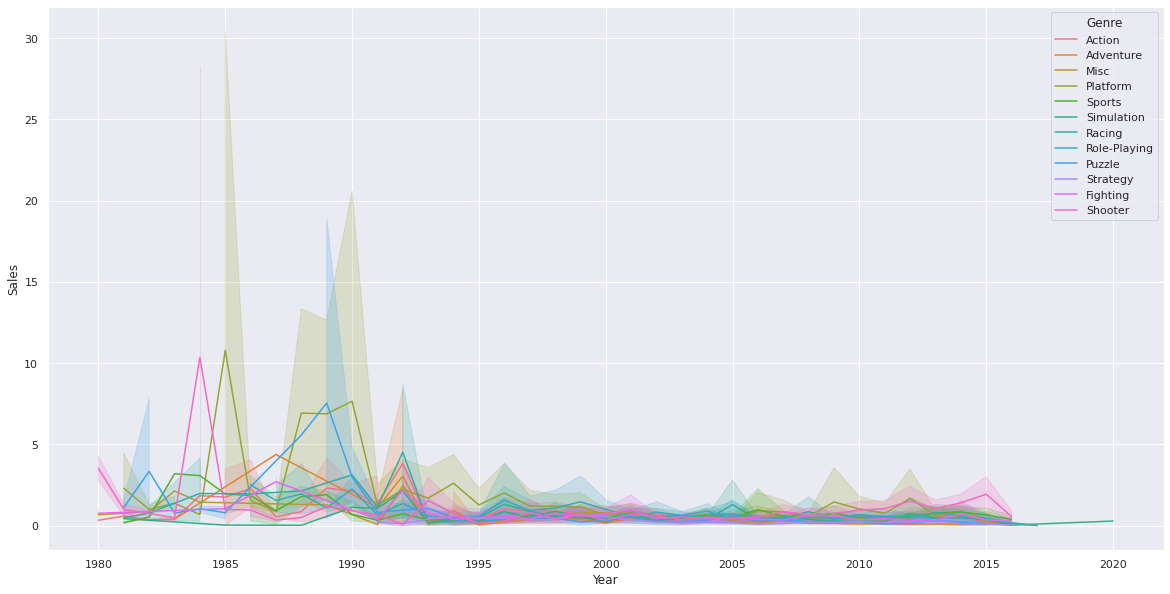

In [71]:
import seaborn  as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=df, x="Year", y="Sales", hue="Genre")

2) 플랫폼에 따른 트렌드가 있나>


In [40]:
model2 = ols('Sales ~ C(Year) * C(Platform)', df).fit()
anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Year),38.0,1010.703042,26.597448,11.601128,5.930132e-69
C(Platform),30.0,1083.541554,36.118052,15.753772,1.007427e-79
C(Year):C(Platform),1140.0,2551.061307,2.237773,0.976060,7.069290e-01
Residual,16000.0,36682.567881,2.292660,NaN,NaN


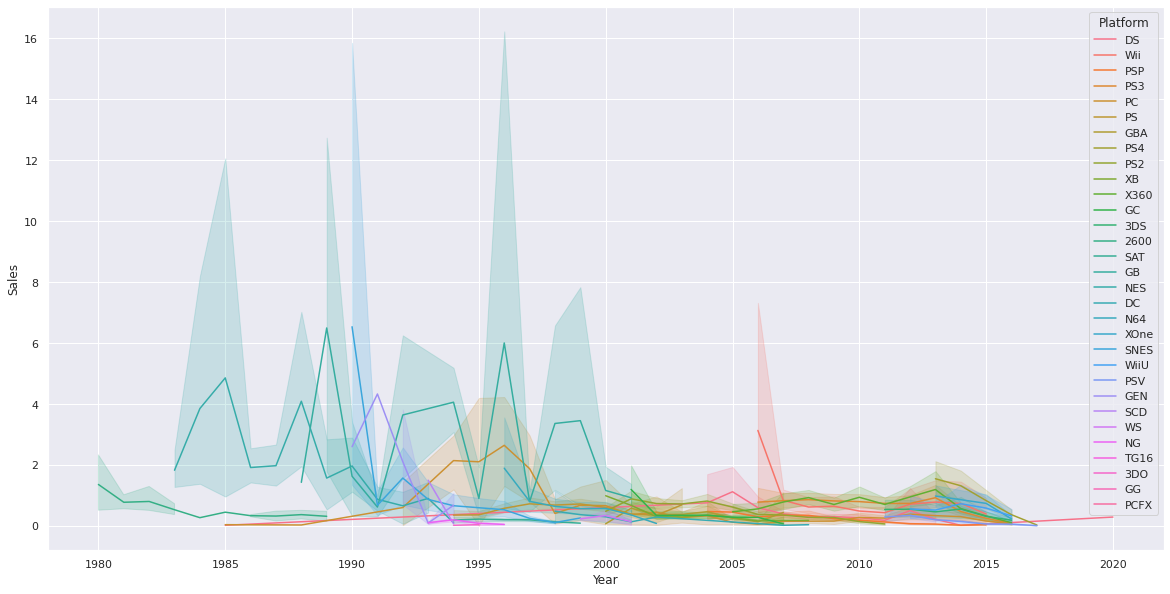

In [133]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=df, x="Year", y="Sales", hue="Platform")

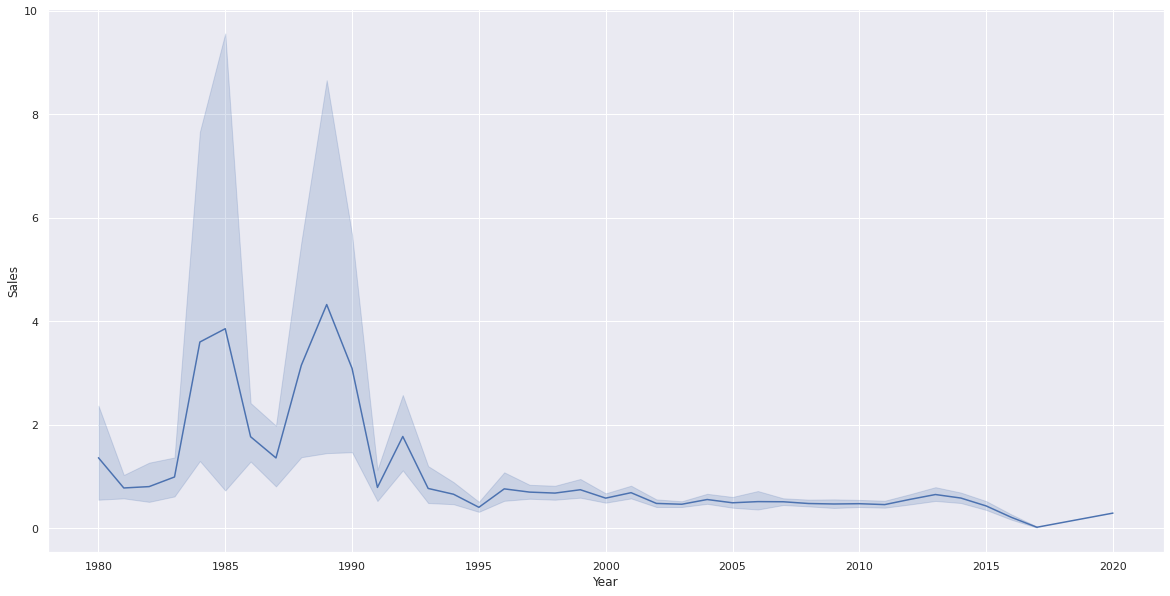

In [132]:
sns.lineplot(data=df, x="Year", y="Sales")

# **3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

출고량 백만 이상 게임에 대해서만 분석


2045개


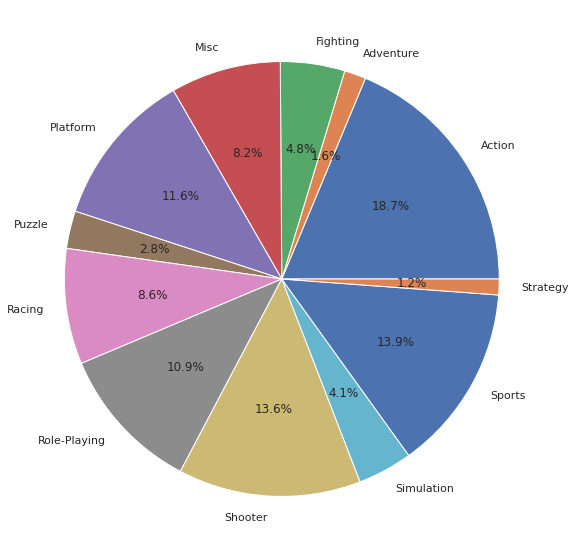

In [111]:
df_high=df[df.Sales >= 1]

df_high_genre=df_high.groupby(by=['Genre'], as_index=False).sum()
plt.pie(df_high_genre['Sales'], labels=df_high_genre['Genre'], autopct='%0.1f%%');

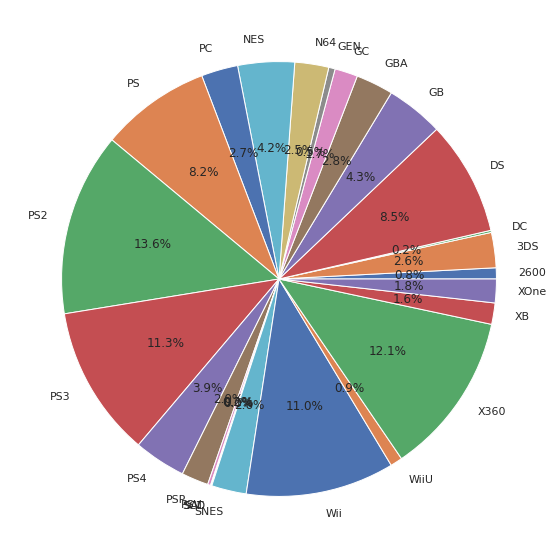

In [131]:
df_high_platform=df_high.groupby(by=['Platform'], as_index=False).sum()

plt.pie(df_high_platform['Sales'], labels=df_high_platform['Platform'], autopct='%0.1f%%');

# * 최근 10년 (2010~), 판매량 백만 이상 의 게임들에 대해서만 분석


In [31]:
df_new=df[(df.Sales >= 1)&(df.Year>=2010)]

df_new

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
24,25,Injustice: Gods Among Us,PS3,2013.0,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23,1.25
66,67,Kirby: Mass Attack,DS,2011.0,Platform,Nintendo,0.52,0.06,0.41,0.05,1.04
92,93,Disney Universe,Wii,2011.0,Action,Disney Interactive Studios,0.67,0.30,0.00,0.10,1.07
126,127,Mortal Kombat,PS3,2011.0,Fighting,Warner Bros. Interactive Entertainment,1.98,0.55,0.00,0.32,2.85
146,147,Fallout 4,PC,2015.0,Role-Playing,Bethesda Softworks,0.50,0.63,0.00,0.10,1.23
...,...,...,...,...,...,...,...,...,...,...,...
16461,16462,Zumba Fitness,X360,2010.0,Sports,505 Games,1.74,0.48,0.00,0.18,2.40
16503,16504,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
16515,16516,Super Mario Galaxy 2,Wii,2010.0,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70
16547,16548,Final Fantasy XIV: A Realm Reborn,PS3,2013.0,Role-Playing,Square Enix,0.36,0.33,0.28,0.15,1.12


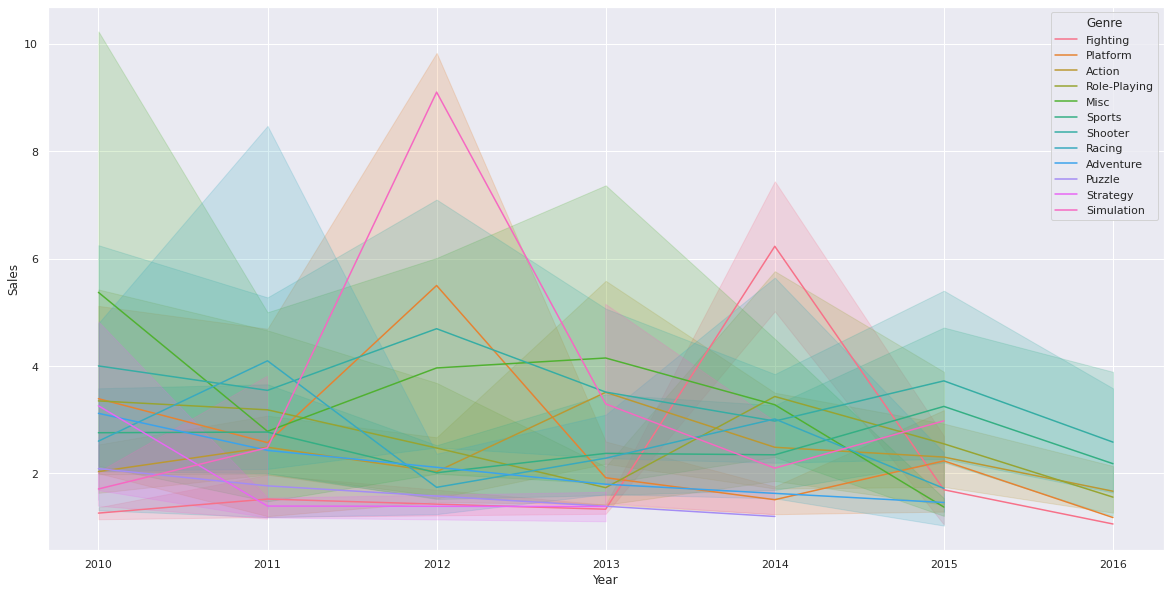

In [125]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=df_new, x="Year", y="Sales", hue="Genre")


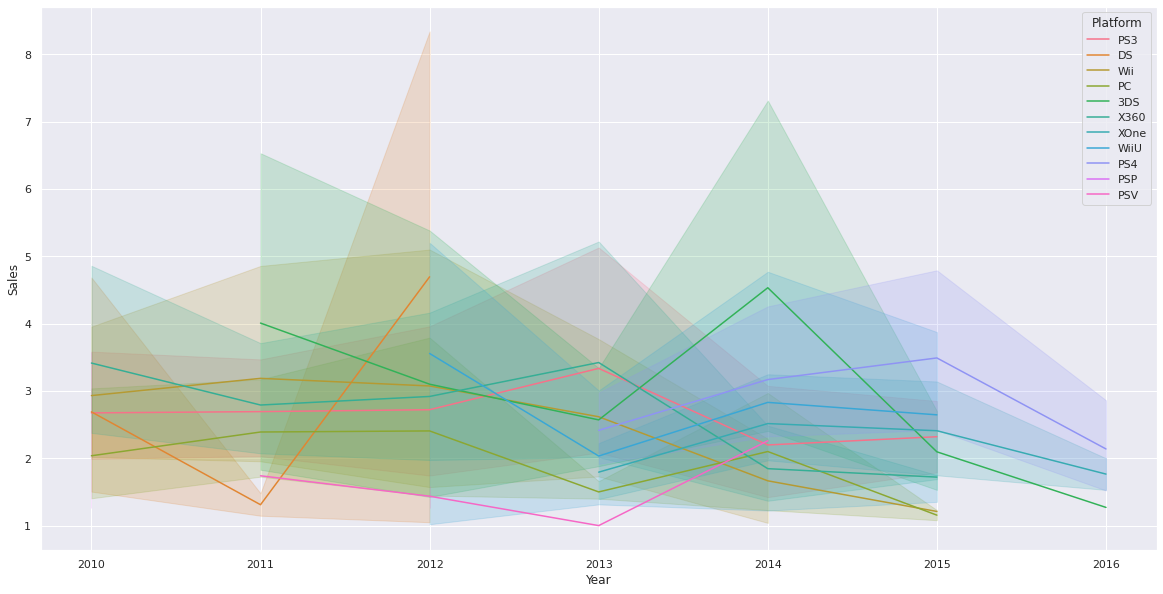

In [123]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=df_new, x="Year", y="Sales", hue="Platform")

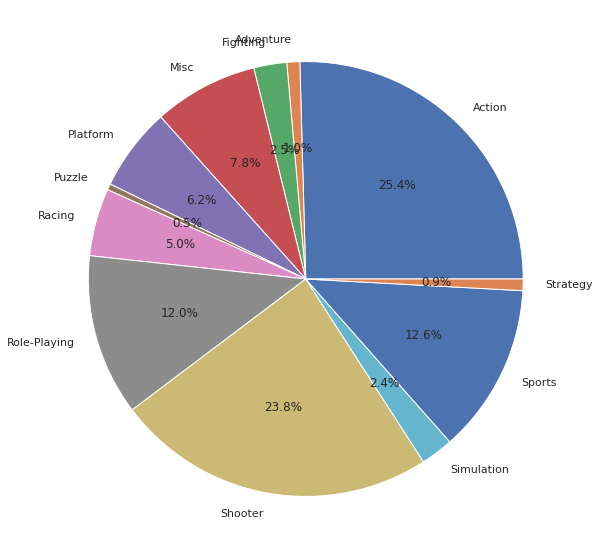

In [126]:
df_new_genre=df_new.groupby(by=['Genre'], as_index=False).sum()

plt.pie(df_new_genre['Sales'], labels=df_new_genre['Genre'], autopct='%0.1f%%');


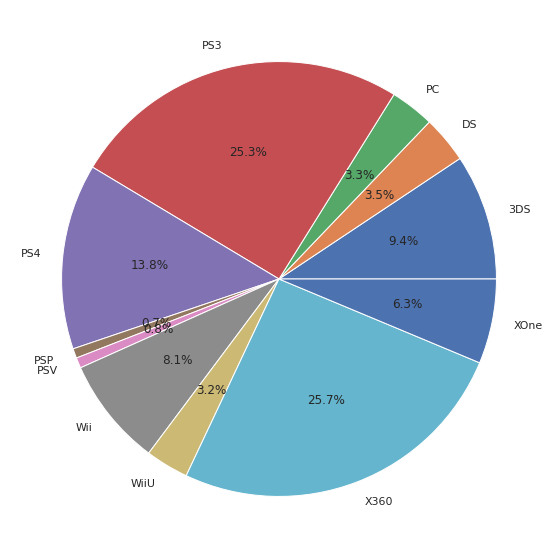

In [129]:
df_new_platform=df_new.groupby(by=['Platform'], as_index=False).sum()

plt.pie(df_new_platform['Sales'], labels=df_new_platform['Platform'], autopct='%0.1f%%');

최근 10년 간 백만 이상의 출고량을 보인 게임들 위주로 보니

플레이 스테이션 / xbox / 닌텐도의 3파전

최근에는 PS5 / xbox series x / nintendo switch 
 
액션, 슈터 장르의 게임이 대세를 이룬다.


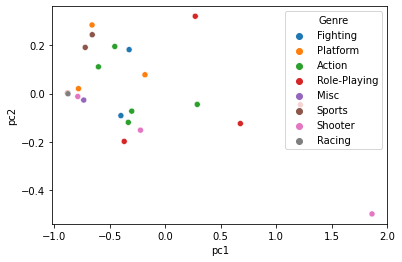

In [37]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


features = df_new.loc[:,'Other_Sales':'Sales'] # 표준화
species = df_new['Genre']

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=['Sales','NA_Sales'])

pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(features)
pcadf = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2'])
ratio=pca.explained_variance_ratio_
ratio

pcadf['Genre']=df_new['Genre'] # species 열추가
sns.scatterplot(x=pcadf.pc1, y=pcadf.pc2, hue=pcadf.Genre) # 산점도